In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
import pandas as pd
import numpy as np
# pd.DataFrame(mnist)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'],mnist['target']
y = y.astype(np.uint8)

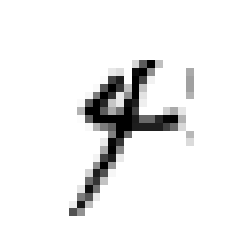

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[53]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [5]:
y[54]

9

In [6]:
X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]

In [7]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [8]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()

sgd_clf.fit(X_train,y_train_5)



SGDClassifier()

In [10]:
iloc = 5

some_digit = X[iloc]

print(sgd_clf.predict([some_digit]),y_train[iloc])

[False] 2


In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True,random_state=42)

for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    # print(train_index,test_index)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))


0.96175
0.96375
0.96925


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3,scoring='accuracy')


array([0.94455, 0.92315, 0.96965])

In [13]:
from sklearn.base import BaseEstimator

class Never5Classifier (BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [14]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53301,  1278],
       [  950,  4471]])

In [16]:
confusion_matrix(y_train_pred,y_train_5)

array([[53301,   950],
       [ 1278,  4471]])

In [17]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

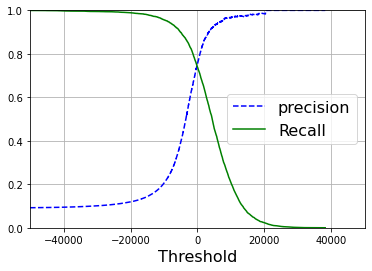

In [18]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

def plot_precision_recall_vs_threshold (precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label='precision')
    plt.plot(thresholds,recalls[:-1],"g-",label='Recall')
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [19]:
y_scores

array([  4255.33310258, -16395.29839403, -35048.72132106, ...,
         8690.7304    ,  -3431.67622186,  -6200.85793725])

In [20]:
precisions

array([0.09079794, 0.09078271, 0.09078423, ..., 1.        , 1.        ,
       1.        ])

In [21]:
recalls

array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [22]:
thresholds.shape

(59704,)

In [23]:
y_train_5.shape

(60000,)

In [24]:
recalls.shape

(59705,)

In [25]:
precisions.shape

(59705,)

In [26]:
y_scores.shape

(60000,)

In [27]:
threshold_90_precision = thresholds[np.argmax(precisions>=.9)]

In [28]:
np.argmax(precisions>.9)

56321

In [29]:
threshold_90_precision

3379.6323084794803

In [30]:
precisions[56180:56188]

array([0.89160045, 0.89185353, 0.89182283, 0.89207611, 0.89232955,
       0.89258312, 0.89255259, 0.89252204])

In [31]:
from sklearn.metrics import precision_score, recall_score

y_train_pred_90 = (y_scores>=threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000886786875554

In [32]:
recall_score(y_train_5,y_train_pred_90)

0.5617044825677919

In [33]:
y_scores

array([  4255.33310258, -16395.29839403, -35048.72132106, ...,
         8690.7304    ,  -3431.67622186,  -6200.85793725])

In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

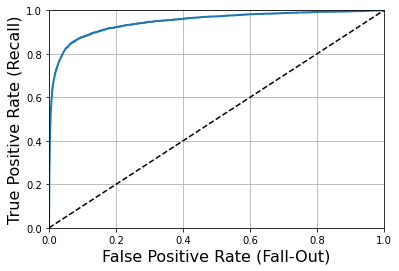

In [42]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--') #dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True) 

plot_roc_curve(fpr,tpr)
plt.show()


In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9482033727883681

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

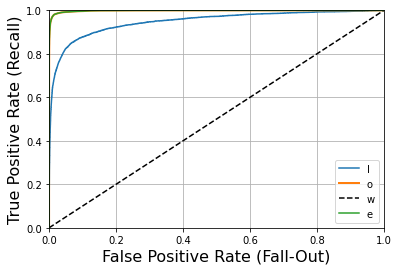

In [51]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)
plt.plot(fpr,tpr,label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.plot(fpr_forest,tpr_forest,label='Forest')
plt.legend("lower right")

In [ ]:
thresholds_forest_90_precision = thresholds_forest[np.argmax(precisions_forest>=.9)]

In [53]:
from sklearn.svm import SVC

svm_clf = SVC()

svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([2], dtype=uint8)

In [54]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.7442516 , -0.30125634,  9.31399134,  7.26965016,  3.75753908,
         3.74771902,  0.71155138,  2.76650678,  8.2765048 ,  6.21840456]])

In [58]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

some_digit_scores = ovr_clf.decision_function([some_digit])
some_digit_scores


array([[-2.03446217, -2.81207233,  1.69822406, -1.13916881, -2.58783509,
        -2.41481011, -2.42337939, -2.5950999 , -1.38478999, -1.30581245]])

In [63]:
svm_clf.predict([some_digit])

array([4], dtype=uint8)

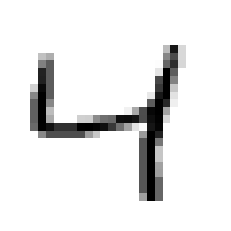

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[2]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [65]:
ovr_clf.predict([some_digit]), svm_clf.predict([some_digit])

(array([4], dtype=uint8), array([4], dtype=uint8))

In [66]:
ovr_clf.decision_function([some_digit])

array([[-2.30153967, -1.42917412, -1.30525385, -1.15028412,  0.9996608 ,
        -1.93171945, -1.90837958, -1.35800767, -2.35901633, -1.80247669]])

In [70]:
svm_clf.classes_[svm_clf.predict([some_digit])]

array([4], dtype=uint8)

In [69]:
svm_clf.predict([some_digit])

array([4], dtype=uint8)

In [72]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([4], dtype=uint8)

In [73]:
sgd_clf.decision_function([some_digit])

array([[-36576.33770382, -27586.14559409,  -2595.16285257,
          2022.07779129,   2144.45737806, -20069.51751741,
        -49836.15563758, -10431.28776467,  -9275.10315793,
         -8430.40547085]])

In [74]:
cross_val_score(sgd_clf,X_train, y_train, cv=3, scoring='accuracy')

array([0.87375, 0.8608 , 0.8805 ])

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train, cv=3, scoring='accuracy')

array([0.89595, 0.89555, 0.8971 ])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


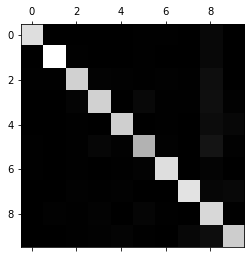

In [78]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx= confusion_matrix(y_train,y_train_pred)
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

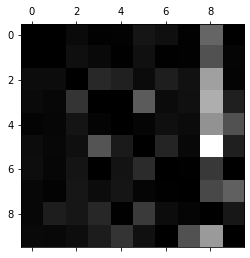

In [79]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()